In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.dates as mdates
import warnings
warnings.filterwarnings('ignore')
import os
os.chdir(r'C:\Users\MANI\Desktop\Healthcare')
df=pd.read_excel('data.xlsx')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 7 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   Date                                          60 non-null     datetime64[ns]
 1   Average Licensed Bed  Occupancy Rate          60 non-null     float64       
 2   Unassisted Fall Rate per 1,000 Patient Days   60 non-null     float64       
 3   Staff Responsiveness Domain Top Box Score     60 non-null     float64       
 4   Unassisted Fall %                             60 non-null     float64       
 5   Staff Responsiveness Domain Top Box Score %   60 non-null     float64       
 6   Staff Responsiveness Top Box Score Benchmark  60 non-null     int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 3.4 KB


In [116]:
df.head()

,Date,Average Licensed Bed Occupancy Rate,"Unassisted Fall Rate per 1,000 Patient Days",Staff Responsiveness Domain Top Box Score,Unassisted Fall %,Staff Responsiveness Domain Top Box Score %,Staff Responsiveness Top Box Score Benchmark
0,2020-01-01,0.96,2.21,68.34,0.221,0.6834,65
1,2020-02-01,0.96,1.79,72.75,0.179,0.7275,65
2,2020-03-01,0.81,1.03,67.07,0.103,0.6707,65
3,2020-04-01,0.94,1.97,71.21,0.197,0.7121,65
4,2020-05-01,1.01,3.41,57.68,0.341,0.5768,65


In [117]:
print("Date Range:",  df['Date'].dt.date.min(),"to", df['Date'].dt.date.max())

Date Range: 2020-01-01 to 2024-12-01


In [118]:
# To check whether all date values are unique
df['Date'].nunique()

60

5 years of data from 2020-01-01 to 2024-12-01

In [119]:
# check for duplicates

duplicates = df.duplicated()
duplicates.sum()

0

No duplicates found

In [120]:
# Rename columns
df.columns = ['Month', 'KPI1', 'KPI2', 'KPI3', 'KPI2%', 'KPI3%', 'KPI3_Benchmark']

df.head()

,Month,KPI1,KPI2,KPI3,KPI2%,KPI3%,KPI3_Benchmark
0,2020-01-01,0.96,2.21,68.34,0.221,0.6834,65
1,2020-02-01,0.96,1.79,72.75,0.179,0.7275,65
2,2020-03-01,0.81,1.03,67.07,0.103,0.6707,65
3,2020-04-01,0.94,1.97,71.21,0.197,0.7121,65
4,2020-05-01,1.01,3.41,57.68,0.341,0.5768,65


In [121]:
df = df.drop(columns=['KPI2%','KPI3%','KPI3_Benchmark'])

In [122]:
df['KPI1'] = df['KPI1']*100

In [123]:
df['KPI1'].describe()

count     60.000000
mean      96.216667
std        2.840934
min       81.000000
25%       95.000000
50%       96.000000
75%       98.000000
max      101.000000
Name: KPI1, dtype: float64

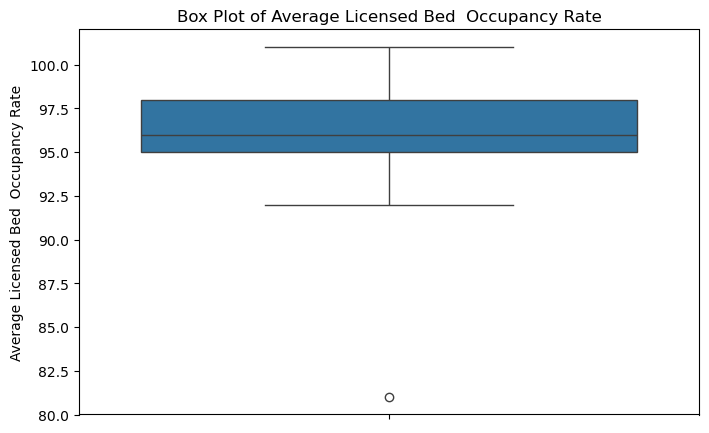

In [124]:
plt.figure(figsize=(8,5))
sns.boxplot(y=df["KPI1"])
plt.title("Box Plot of Average Licensed Bed  Occupancy Rate")
plt.ylabel("Average Licensed Bed  Occupancy Rate")
plt.show()

In [125]:
df[df["KPI1"] <  85] #less than the benchmark value

,Month,KPI1,KPI2,KPI3
2,2020-03-01,81.0,1.03,67.07


Insights: There is only one outlier where KPI1 = 81

In [126]:
df['KPI2'].describe()

count    60.000000
mean      2.607833
std       0.500712
min       1.030000
25%       2.310000
50%       2.590000
75%       3.030000
max       3.410000
Name: KPI2, dtype: float64

In [127]:
df[df['KPI2'] > 2.3] #below benchmark

,Month,KPI1,KPI2,KPI3
4,2020-05-01,101.0,3.41,57.68
5,2020-06-01,98.0,2.61,67.86
6,2020-07-01,95.0,2.42,66.09
8,2020-09-01,95.0,3.11,53.31
10,2020-11-01,95.0,2.31,60.35
11,2020-12-01,98.0,2.47,61.33
12,2021-01-01,100.0,3.03,61.06
13,2021-02-01,99.0,2.35,65.23
14,2021-03-01,95.0,2.47,64.02
16,2021-05-01,94.0,2.54,68.16


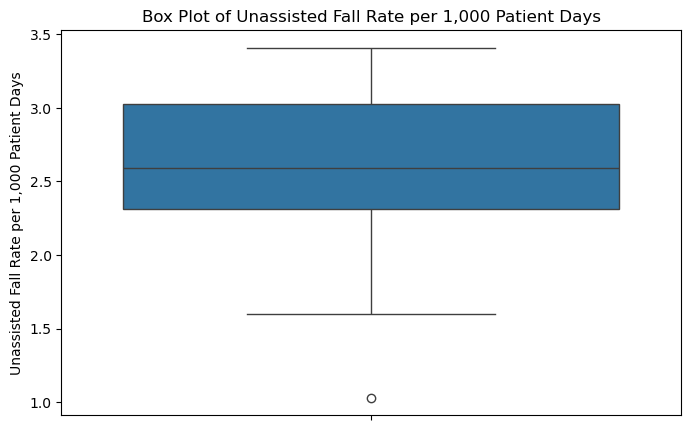

In [128]:
plt.figure(figsize=(8,5))
sns.boxplot(y=df["KPI2"])
plt.title("Box Plot of Unassisted Fall Rate per 1,000 Patient Days")
plt.ylabel("Unassisted Fall Rate per 1,000 Patient Days")
plt.show()

In [129]:
df[df["KPI2"] <  1.5] #outliers check

,Month,KPI1,KPI2,KPI3
2,2020-03-01,81.0,1.03,67.07


Insights: There is only one outlier where KPI2 = 1.03. It is the same record for which the KPI1 value is the outlier. 
In the month of March, 2020 both KPI1 and KPI2 are outliers. 

In [130]:
df["KPI3"].describe()

count    60.000000
mean     63.087500
std       4.148518
min      53.310000
25%      60.342500
50%      63.620000
75%      65.992500
max      72.750000
Name: KPI3, dtype: float64

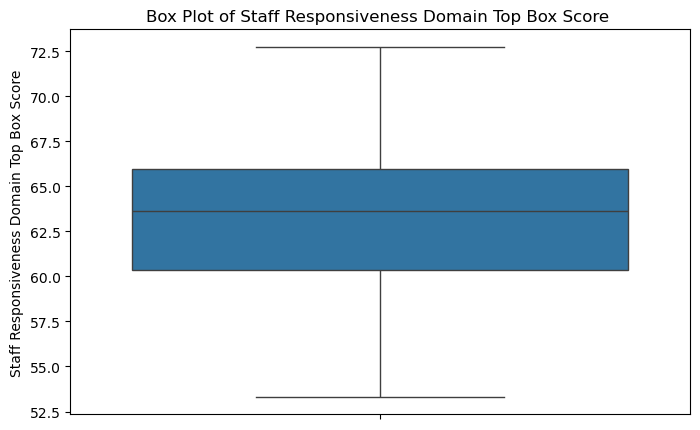

In [131]:
# Boxplot of KPI3
plt.figure(figsize=(8,5))
sns.boxplot(y=df["KPI3"])
plt.title("Box Plot of Staff Responsiveness Domain Top Box Score ")
plt.ylabel("Staff Responsiveness Domain Top Box Score")
plt.show()

In [132]:
df[ (df['KPI3'] < 52) | (df['KPI3'] > 73) ]

,Month,KPI1,KPI2,KPI3


Insights: No outliers

<Figure size 1000x600 with 0 Axes>

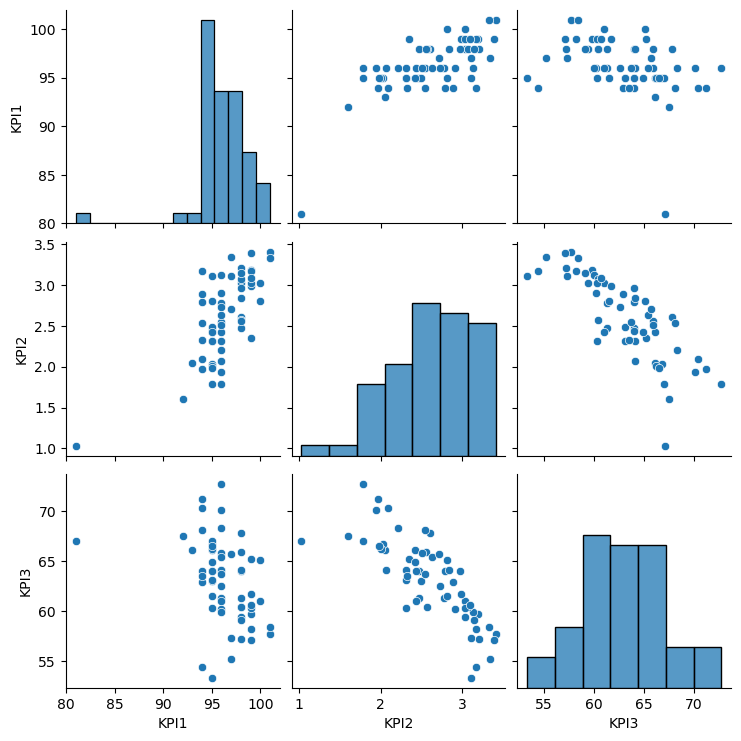

In [133]:
plt.figure(figsize=(10,6))
sns.pairplot(df)
plt.show()

In [134]:
print(df[["KPI1", "KPI2", "KPI3"]].corr())

          KPI1      KPI2      KPI3
KPI1  1.000000  0.700112 -0.371821
KPI2  0.700112  1.000000 -0.791340
KPI3 -0.371821 -0.791340  1.000000


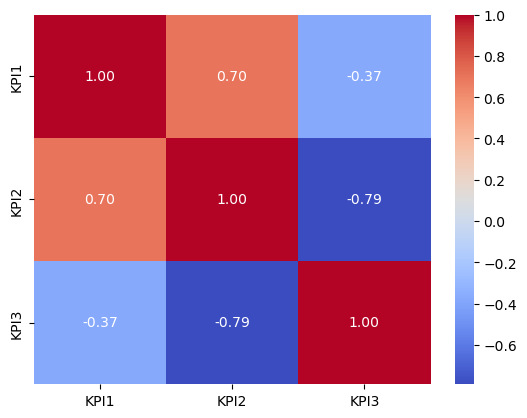

In [135]:
sns.heatmap(df[["KPI1", "KPI2", "KPI3"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.savefig("KPI_heatmap.png", dpi=300, bbox_inches="tight")
plt.show()

Insights:
KPI1 (Bed Occupancy Rate) and KPI2 (Fall Rate per 1,000 Patient Days) – 0.70:
Strong positive correlation. As the bed occupancy rate increases, the unassisted fall rate tends to increase as well.
Interpretation: Higher bed occupancy (more patients in the hospital) might lead to increased pressure on hospital staff, 
which could result in a higher fall rate. This suggests a possible need for more efficient staffing or patient monitoring 
as occupancy increases.

KPI1 (Bed Occupancy Rate) and KPI3 (Staff Responsiveness Score) – -0.37:
Moderate negative correlation. As bed occupancy increases, staff responsiveness tends to decrease slightly.
Interpretation: Higher occupancy may cause more strain on hospital staff, potentially affecting their ability to be as 
responsive to patient needs. This could point to a need for better resource management or training in high-demand situations.

KPI2 (Fall Rate per 1,000 Patient Days) and KPI3 (Staff Responsiveness Score) – -0.79:
Strong negative correlation. As staff responsiveness improves (higher score), the fall rate tends to decrease.
Interpretation: Better staff responsiveness is strongly linked to fewer falls, which makes sense—responsive staff are likely 
to be more proactive in ensuring patient safety and preventing falls.

Summary of Key Relationships:
Higher bed occupancy is associated with higher fall rates and slightly lower staff responsiveness. Hospitals may need to 
ensure that higher occupancy does not overwhelm staff, potentially compromising patient safety and care.
Better staff responsiveness is strongly associated with fewer falls, indicating that when staff are more responsive, 
patient safety improves, and falls are reduced.

In [136]:
df.head(2)

,Month,KPI1,KPI2,KPI3
0,2020-01-01,96.0,2.21,68.34
1,2020-02-01,96.0,1.79,72.75


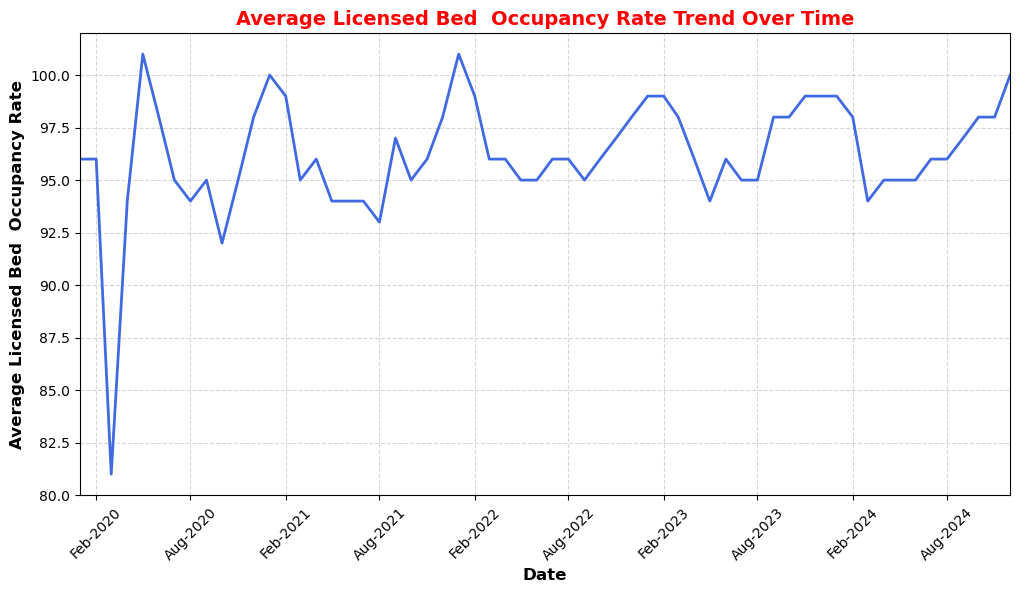

In [137]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="Month", y="KPI1", color="royalblue", linewidth=2)
plt.xlabel("Date", fontsize=12, fontweight="bold")
plt.ylabel("Average Licensed Bed  Occupancy Rate", fontsize=12, fontweight="bold")
plt.title("Average Licensed Bed  Occupancy Rate Trend Over Time", fontsize=14, fontweight="bold", color="red")

# Format x-axis to show Month-Year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))  # Jan-2010 format
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))  # Show every 2nd month

plt.xticks(rotation=45)

# Set x-axis limits to start from the first date in the dataset
plt.xlim(df["Month"].min(), df["Month"].max())

# Show grid for better readability
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

In [138]:
df["Month_Name"] = df["Month"].dt.month_name()
kpi1_by_month = df.groupby("Month_Name")["KPI1"].mean() # Aggregate KPI1 by month (averaging values)

# Sort months in order (Jan–Dec)
month_order = [
    "January", "February", "March", "April", "May", "June", 
    "July", "August", "September", "October", "November", "December"
]

# kpi1_by_month = kpi1_by_month.reindex(month_order)
kpi1_by_month

Month_Name
April        95.4
August       94.8
December     98.6
February     98.2
January      99.0
July         95.2
June         95.6
March        92.8
May          95.8
November     97.0
October      95.8
September    96.4
Name: KPI1, dtype: float64

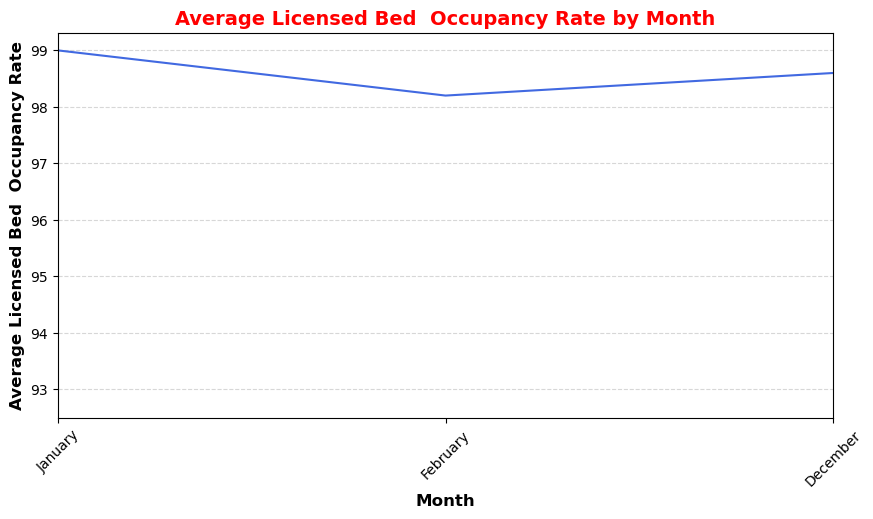

In [139]:
# Plot KPI1 by Month
plt.figure(figsize=(10, 5))
sns.lineplot(x=kpi1_by_month.index, y=kpi1_by_month.values, color="royalblue")

# Formatting
plt.xlabel("Month", fontsize=12, fontweight="bold")
plt.ylabel("Average Licensed Bed  Occupancy Rate", fontsize=12, fontweight="bold")
plt.title("Average Licensed Bed  Occupancy Rate by Month", fontsize=14, fontweight="bold", color="red")

# Set x-axis limits to start from the first date in the dataset
plt.xlim("January", "December")

plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

In [142]:
# Extract year name
df["year"] = df["Month"].dt.year

# Aggregate KPI1 by month (averaging values)
kpi1_by_year = round(df.groupby("year")["KPI1"].mean(), 3)
kpi1_by_year

year
2020    94.583
2021    95.917
2022    96.667
2023    97.167
2024    96.750
Name: KPI1, dtype: float64

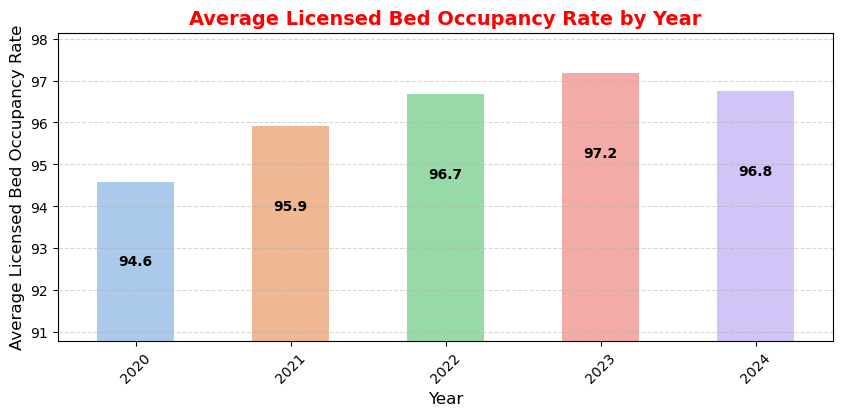

In [143]:
plt.figure(figsize=(10, 4))

# Bar plot with thinner bars
sns.barplot(x=kpi1_by_year.index, y=kpi1_by_year.values, palette="pastel", width=0.5)  # Decrease width to make bars thinner

# Adjust Y-axis limits to zoom in on variations
plt.ylim(kpi1_by_year.min() * 0.96, kpi1_by_year.max() * 1.01)

# Formatting
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Licensed Bed Occupancy Rate", fontsize=12)
plt.title("Average Licensed Bed Occupancy Rate by Year", fontsize=14, fontweight="bold", color="red")

# Add values on top of bars
for i, value in enumerate(kpi1_by_year.values):
    plt.text(i, value - 2, f"{value:.1f}", ha="center", fontsize=10, fontweight="bold")

# Improve x-axis readability
plt.xticks(rotation=45)

# Add a grid for better comparison
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Save the figure
plt.savefig("KPI1_plot.png", dpi=300, bbox_inches="tight")

plt.show()

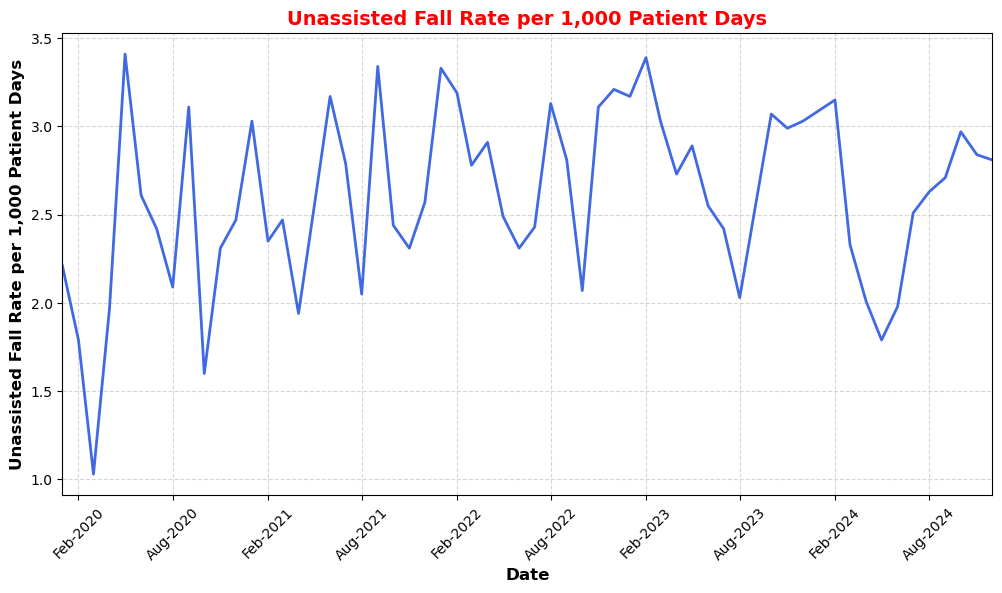

In [144]:
# KPI2 vs Time
# Set figure size
plt.figure(figsize=(12, 6))

# Line plot
sns.lineplot(data=df, x="Month", y="KPI2", color="royalblue", linewidth=2)

# Labels & Title
plt.xlabel("Date", fontsize=12, fontweight="bold")
plt.ylabel("Unassisted Fall Rate per 1,000 Patient Days", fontsize=12, fontweight="bold")
plt.title("Unassisted Fall Rate per 1,000 Patient Days", fontsize=14, fontweight="bold", color="red")

# Format x-axis to show Month-Year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))  # Jan-2010 format
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))  # Show every 2nd month

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set x-axis limits to start from the first date in the dataset
plt.xlim(df["Month"].min(), df["Month"].max())

# Show grid for better readability
plt.grid(True, linestyle="--", alpha=0.5)

# Show plot
plt.show()

In [145]:
# Extract month name
df["Month_Name"] = df["Month"].dt.month_name()

# Aggregate KPI1 by month (averaging values)
kpi2_by_month = df.groupby("Month_Name")["KPI2"].mean()

# Sort months in order (Jan–Dec)
month_order = [
    "January", "February", "March", "April", "May", "June", 
    "July", "August", "September", "October", "November", "December"
]
kpi2_by_month = kpi2_by_month.reindex(month_order)
kpi2_by_month

Month_Name
January      2.966
February     2.774
March        2.328
April        2.312
May          2.624
June         2.524
July         2.514
August       2.386
September    2.906
October      2.430
November     2.712
December     2.818
Name: KPI2, dtype: float64

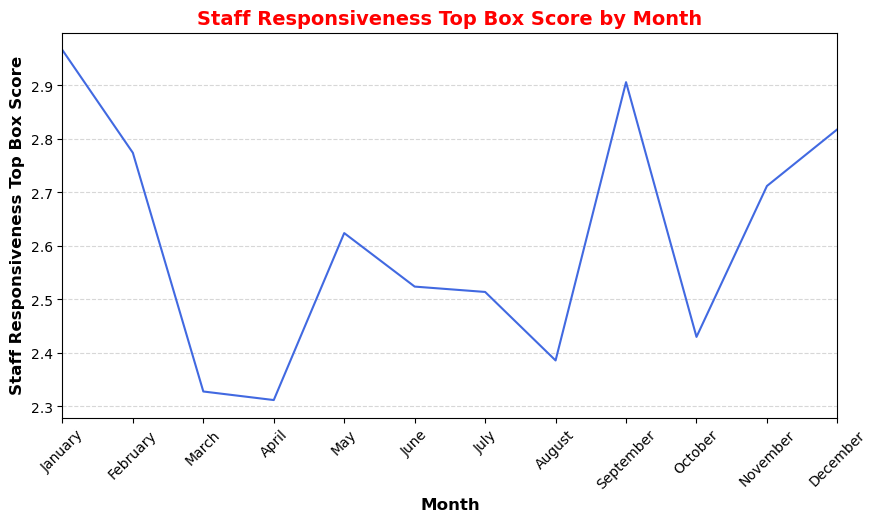

In [155]:
# Plot KPI2 by Month
plt.figure(figsize=(10, 5))
sns.lineplot(x=kpi2_by_month.index, y=kpi2_by_month.values, color="royalblue")

# Formatting
plt.xlabel("Month", fontsize=12, fontweight="bold")
plt.ylabel("Staff Responsiveness Top Box Score", fontsize=12, fontweight="bold")
plt.title("Staff Responsiveness Top Box Score by Month", fontsize=14, fontweight="bold", color="red")

# Set x-axis limits to start from the first date in the dataset
plt.xlim("January", "December")

plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

In [146]:
# KPI2 by year
# Extract year name
df["year"] = df["Month"].dt.year

# Aggregate KPI2 by month (averaging values)
kpi2_by_year = round(df.groupby("year")["KPI2"].mean(), 2)

# Reset index
kpi2_by_year

year
2020    2.25
2021    2.58
2022    2.81
2023    2.82
2024    2.57
Name: KPI2, dtype: float64

In [147]:
print(round(kpi2_by_year.mean(),2))

2.61


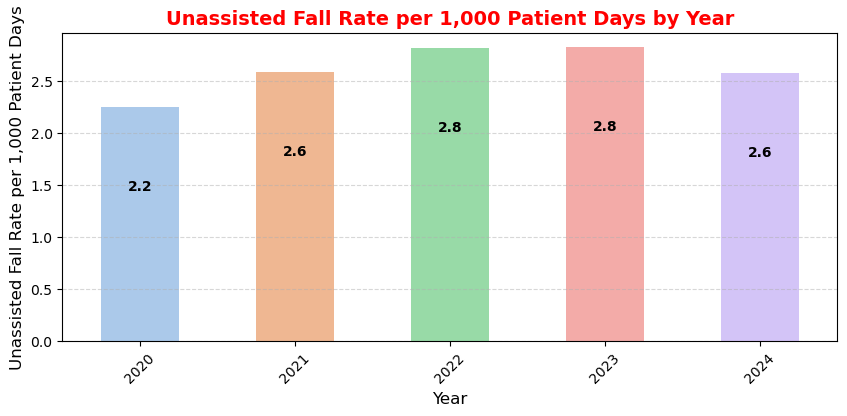

In [148]:
plt.figure(figsize=(10, 4))

# Bar plot with thinner bars
sns.barplot(x=kpi2_by_year.index, y=kpi2_by_year.values, palette="pastel", width=0.5)  # Decrease width to make bars thinner

# Adjust Y-axis limits to zoom in on variations
#plt.ylim(kpi2_by_year.min() * 0.96, kpi2_by_year.max() * 1.01)

# Formatting
plt.xlabel("Year", fontsize=12)
plt.ylabel("Unassisted Fall Rate per 1,000 Patient Days", fontsize=12)
plt.title("Unassisted Fall Rate per 1,000 Patient Days by Year", fontsize=14, fontweight="bold", color="red")

# Add values on top of bars
for i, value in enumerate(kpi2_by_year.values):
    plt.text(i, value - 0.8, f"{value:.1f}", ha="center", fontsize=10, fontweight="bold")

# Improve x-axis readability
plt.xticks(rotation=45)

# Add a grid for better comparison
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Save the figure
plt.savefig("KPI2_plot.png", dpi=300, bbox_inches="tight")

plt.show()

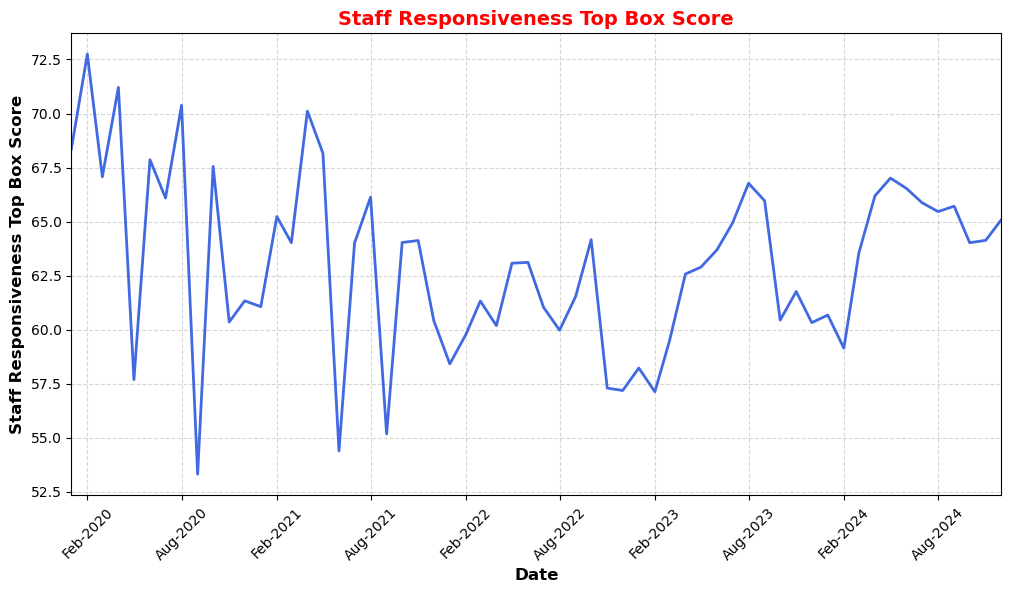

In [149]:
# KPI3 vs Time
# Set figure size
plt.figure(figsize=(12, 6))

# Line plot
sns.lineplot(data=df, x="Month", y="KPI3", color="royalblue", linewidth=2)

# Labels & Title
plt.xlabel("Date", fontsize=12, fontweight="bold")
plt.ylabel("Staff Responsiveness Top Box Score", fontsize=12, fontweight="bold")
plt.title("Staff Responsiveness Top Box Score", fontsize=14, fontweight="bold", color="red")

# Format x-axis to show Month-Year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))  # Jan-2010 format
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))  # Show every 2nd month

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set x-axis limits to start from the first date in the dataset
plt.xlim(df["Month"].min(), df["Month"].max())

# Show grid for better readability
plt.grid(True, linestyle="--", alpha=0.5)

# Show plot
plt.show()

In [150]:
# KPI3 by month
# Extract month name
df["Month_Name"] = df["Month"].dt.month_name()

# Aggregate KPI3 by month (averaging values)
kpi3_by_month = df.groupby("Month_Name")["KPI3"].mean()

# Sort months in order (Jan–Dec)
month_order = [
    "January", "February", "March", "April", "May", "June", 
    "July", "August", "September", "October", "November", "December"
]
kpi3_by_month = kpi3_by_month.reindex(month_order)
kpi3_by_month

Month_Name
January      61.340
February     62.802
March        63.082
April        66.052
May          63.762
June         63.114
July         64.384
August       65.742
September    60.336
October      64.040
November     61.530
December     60.866
Name: KPI3, dtype: float64

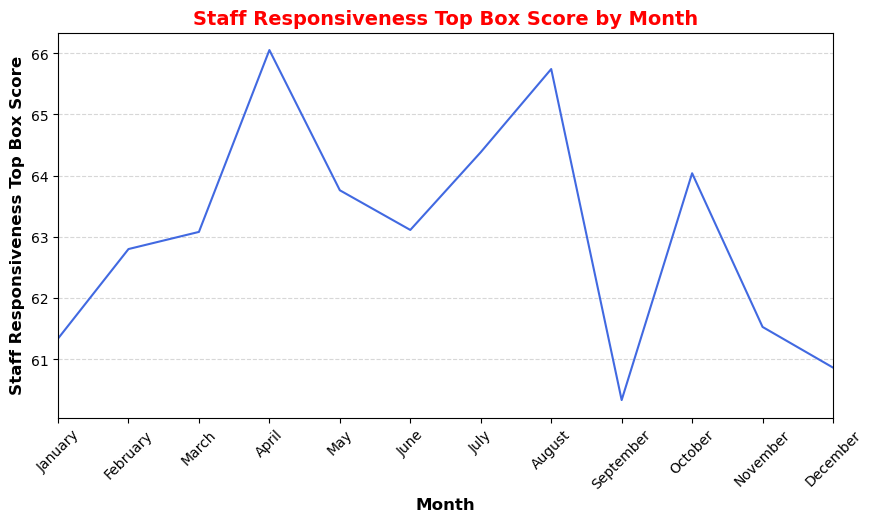

In [151]:
# Plot KPI3 by Month
plt.figure(figsize=(10, 5))
sns.lineplot(x=kpi3_by_month.index, y=kpi3_by_month.values, color="royalblue")

# Formatting
plt.xlabel("Month", fontsize=12, fontweight="bold")
plt.ylabel("Staff Responsiveness Top Box Score", fontsize=12, fontweight="bold")
plt.title("Staff Responsiveness Top Box Score by Month", fontsize=14, fontweight="bold", color="red")

# Set x-axis limits to start from the first date in the dataset
plt.xlim("January", "December")

plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

In [152]:
# KPI3 by year
# Extract year name
df["year"] = df["Month"].dt.year

# Aggregate KPI3 by month (averaging values)
kpi3_by_year = round(df.groupby("year")["KPI3"].mean(), 2)

# Reset index
kpi3_by_year

year
2020    65.33
2021    63.07
2022    60.58
2023    62.01
2024    64.45
Name: KPI3, dtype: float64

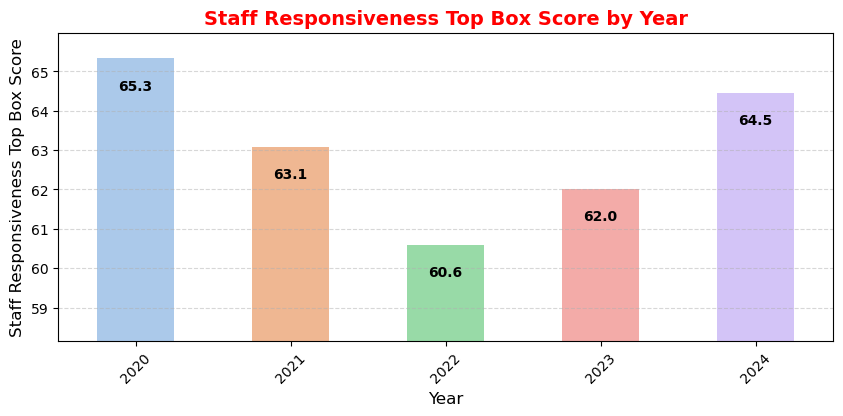

In [153]:
plt.figure(figsize=(10, 4))

# Bar plot with thinner bars
sns.barplot(x=kpi3_by_year.index, y=kpi3_by_year.values, palette="pastel", width=0.5)  # Decrease width to make bars thinner

# Adjust Y-axis limits to zoom in on variations
plt.ylim(kpi3_by_year.min() * 0.96, kpi3_by_year.max() * 1.01)

# Formatting
plt.xlabel("Year", fontsize=12)
plt.ylabel("Staff Responsiveness Top Box Score", fontsize=12)
plt.title("Staff Responsiveness Top Box Score by Year", fontsize=14, fontweight="bold", color="red")

# Add values on top of bars
for i, value in enumerate(kpi3_by_year.values):
    plt.text(i, value - 0.8, f"{value:.1f}", ha="center", fontsize=10, fontweight="bold")

# Improve x-axis readability
plt.xticks(rotation=45)

# Add a grid for better comparison
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Save the figure
plt.savefig("KPI3_plot.png", dpi=300, bbox_inches="tight")

plt.show()

1. Average Licensed Bed Occupancy Rate (KPI1)
Your hospital: 96.22%
U.S. benchmark: ~66%
Inference:
Your hospital has a significantly higher occupancy rate than the national average.
This could indicate strong patient demand, efficient utilization of beds, or potential capacity issues.
A consistently high occupancy rate above 85% might lead to overcrowding, strain on staff, and reduced patient satisfaction.

2. Unassisted Fall Rate per 1,000 Patient Days (KPI2)
Your hospital: 2.61 falls per 1,000 patient days
Benchmark: 2.3 – 13 falls per 1,000 patient days
Inference:
Your hospital's fall rate is on the lower end of the national range, which is a positive sign.
It suggests good patient safety measures and fall prevention protocols.
However, continuous monitoring is essential to prevent increases, especially with high bed occupancy.

3. Staff Responsiveness Domain Top Box Score (KPI3)
Your hospital: 63.09%
Benchmark: 85% – 90%
Inference:
Your staff responsiveness score is below industry standards, which may indicate delays in addressing patient needs.
The high bed occupancy rate (KPI1) could be a contributing factor, as staff might be overwhelmed.
Improving staffing levels, response times, and communication could help boost this metric.

Final Assessment
High Bed Occupancy (KPI1) and Low Staff Responsiveness (KPI3) suggest potential operational strain.
Despite high occupancy, fall prevention efforts (KPI2) appear effective.
Improving staff responsiveness may enhance patient satisfaction and overall hospital efficiency.

In [156]:
df.to_csv('data1.csv', index=False)